# The Idea
* Best $\approx$ Optimal
* _Optimal_ : “Minimize error” or “Maximize likelihood”
* 입력값을 조금씩 바꿔 가면서 시스템의 출력값과 우리가 기대하는 출력값을 차이가 Maximum또는 Minimum일 때의 입력 값을 찾는다.
* 비슷한 예
    + 어떤 약의 복용량을 조금씩 바꿔가면서(늘이거나/줄이거나), 복용량이 얼마일 때 가장 효과적인가 찾는다
    + 두 색을 섞어서 원하는 색을 만들 때, 두 색을 각각 얼마씩 섞으면 좋을지 섞는 비율을 조금씩 달리하면서 가장 이상적인 비율을 찾는다

## 예) 간단한 1차 방정식 풀기
* $y=ax+b$
* $(x,y)$ 쌍으로 주어진 여러 데이터(측정값)가 있을 때, 이 데이터들의 관계를 가장 잘 일반화할 수 있는 $a$와 $b$를 찾아라
  + 전제) $x$와 $y$는 서로 선형(linear) 관계가 있다 (정확히 선형관계는 아니지만 상당부분 선형 관계가 있다)
  + 예) (공부하는 시간, 성적), (근속년수, 연봉), (경기출전수, 득점수)
* $(x,y)$ 쌍이 두 개 : 연립방정식으로 푼다
* $(x,y)$ 쌍이 100 개면?
  + 100 개의 데이터 쌍을 모두 정확히 설명하는 $a$와 $b$는 없다
  + 그러나, 100 개의 데이터 쌍을 가장 근접하게 설명할 수 있는 $a$와 $b$는 찾을 수 있을 것이다
    - $a$와 $b$를 조금씩 바꿔가면서, 100개의 데이터 쌍을 가장 비슷하게 맞추는 $a$와 $b$를 찾는다

### 핵심
* $a$와 $b$를 어느 정도 바꿔볼까? 증가시킬까? 감소시킬까?
* "가장 근접한" $a$와 $b$를 어떻게 판단할까?

# 에러 측정하기
* 주어진 입력에 대해, 시스템이 출력하는 값과 이상적인 값의 차이를 측정
    + 입력 : 숫자의 리스트 (Vector)
    + 출력 : 숫자
*  차이(Error) 측정 예 - Sum of Squares
    + 여러 입력 데이터에 대해, 각 데이터를 가지고 시행해 본 결과에서 얻은 Error를 제곱하여 모두 더하기
    + Error를 제곱하면
        - 모두 양수(Positive)가 된다
        - 0~1 사이의 작은 차이는 더욱 작아지고, 1보다 큰 차이는 제곱으로 증폭된다
    + Error의 제곱합이 작을 수록 더 좋은 결과를 낸다고 판단한다

In [2]:
# 'scratch' package가 설치된 디렉토리
import os, sys
os.chdir('..')

from scratch.linear_algebra import Vector, dot

In [3]:
def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

# Gradient
* 기울기, 변화량, 변화방향(증가/감소)을 나타낸다
    + 미분값으로 측정
* Error의 Gradient 측정
    + 값을 증가시켰더니 Gradient가 커지면(작아지면) &rarr; 빼준다(더해준다) 
    + 값을 감소시켰더니 Gradient가 커지면(작아지면) &rarr; 더해준다(빼준다)
    + 많이 커지면(작아지면) &rarr; 많이 빼준다(더해준다)

## 수학적 미분 vs. 기계적 미분추정)

In [11]:
from typing import Callable

def square(x: float) -> float:
    return x * x

# 수학적 미분 (x^2 미분 --> 2x)
def derivative(x: float) -> float:
    return 2 * x

# 기계적 미분 (단일 변수 - x)
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

# 기계적 편미분 (여러개 변수 - v)
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h
    
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

### 비교 예) $x^2$에 대해 수학적 미분 vs. 기계적 미분추정
* 수학적인 미분식으로 얻은 값과 기계적(Computational)으로 구한 값이 거의 비슷하다

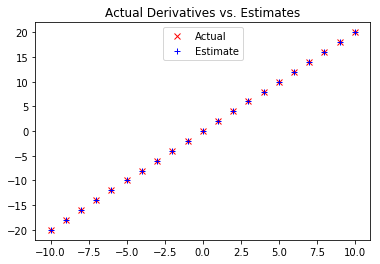

In [7]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
plt.legend(loc=9)
plt.show()


# Using the Gradient
* Gradient를 이용하여 sum_of_squares([x,y,z]) 함수가 최소값을 갖는 [x,y,z]를 찾아보자
    + sum_of_squares() 함수는 [x,y,x]=[0,0,0] 일 때 최소값(0)이 될 것이다!
        - 우리는 이미 답을 알고 있음
* 방법
    + 처음에 [x,y,x]는 랜덤값으로 시작
    + Gradient를 이용하여 [x,y,x] 값을 조금씩 변경(더하거나 빼거나) &rarr; 여러번 반복
        - sum_of_squares()의 Gradient : [2x, 2y, 2x] 
        - x^2의 미분 &rarr; 2x
    + 최종적으로 [x,y,x]=[0,0,0]에 근접하는 결과가 나오는가?

In [8]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

# x^2 의 미분 --> 2x
def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [10]:
# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    
    # 값을 증가시켰더니 Gradient가 커지면(작아지면) → 빼준다(더해준다)
    # 값을 감소시켰더니 Gradient가 커지면(작아지면) → 더해준다(빼준다)
    # 많이 커지면(작아지면) → 많이 빼준다(더해준다)
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step

    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0

0 [8.929252647527214, -5.818080058511264, -5.3371443434425805]
1 [8.75066759457667, -5.701718457341039, -5.230401456573729]
2 [8.575654242685138, -5.5876840881942185, -5.125793427442254]
3 [8.404141157831436, -5.475930406430334, -5.023277558893409]
4 [8.236058334674807, -5.366411798301727, -4.922812007715541]
5 [8.07133716798131, -5.259083562335693, -4.824355767561229]
6 [7.9099104246216845, -5.153901891088979, -4.727868652210005]
7 [7.751712216129251, -5.050823853267199, -4.633311279165805]
8 [7.596677971806666, -4.949807376201855, -4.540645053582489]
9 [7.444744412370532, -4.850811228677818, -4.449832152510839]
10 [7.295849524123121, -4.753795004104262, -4.360835509460623]
11 [7.1499325336406585, -4.658719104022177, -4.273618799271411]
12 [7.006933882967846, -4.565544721941734, -4.188146423285983]
13 [6.866795205308489, -4.474233827502899, -4.104383494820263]
14 [6.729459301202319, -4.384749150952841, -4.022295824923858]
15 [6.594870115178273, -4.2970541679337835, -3.9418499084253806

963 [3.173408663910917e-08, -2.067714555049567e-08, -1.896792572524436e-08]
964 [3.109940490632698e-08, -2.0263602639485755e-08, -1.8588567210739474e-08]
965 [3.0477416808200446e-08, -1.985833058669604e-08, -1.8216795866524685e-08]
966 [2.986786847203644e-08, -1.946116397496212e-08, -1.785245994919419e-08]
967 [2.927051110259571e-08, -1.9071940695462878e-08, -1.7495410750210306e-08]
968 [2.8685100880543795e-08, -1.869050188155362e-08, -1.71455025352061e-08]
969 [2.8111398862932918e-08, -1.8316691843922548e-08, -1.6802592484501976e-08]
970 [2.7549170885674258e-08, -1.7950358007044098e-08, -1.6466540634811936e-08]
971 [2.6998187467960773e-08, -1.7591350846903216e-08, -1.6137209822115698e-08]
972 [2.645822371860156e-08, -1.723952382996515e-08, -1.5814465625673385e-08]
973 [2.592905924422953e-08, -1.6894733353365848e-08, -1.5498176313159917e-08]
974 [2.541047805934494e-08, -1.655683868629853e-08, -1.518821278689672e-08]
975 [2.490226849815804e-08, -1.622570191257256e-08, -1.488444853115878

# Using Gradient Descent to Fit Models
* 예) $y=20x + 5$
* (x,y) 값들이 여러개 주어졌을 때, Gradient Descent를 이용하여 계수 '20'과 '5'를 근접하게 구할 수 있는가?
    + 계수 '20'과 '5'를 Vector *theta* 로 표현
    + $y=\alpha x + \beta$
        - *theta* : $[\alpha, \beta]$
* 방법(이전과 비슷)
    + 처음에 *theta*는 랜덤값으로 시작
    + Gradient를 이용하여 *theta* 값을 조금씩 변경(더하거나 빼거나) → 여러번 반복
      - 주어진 입력값 x에 대해, *theta* 값을 이용하여 y값 계산
      - *theta* 값을 이용하여 y값 계산한 y값과  x에 대한 실제 y값($20x+5$)의 차이(error)를 구함
      - 주어진 모든 (x,y)값에 대하여 Sum fo Squared Error와 이의 Gradient를 구함
        + Sum fo Squared Error가 0에 가까울수록 &rarr; 우리가 기대하는 *theta* 값
        + sum_of_squares()의 Gradient : [2 * error * x, 2 * error]
      - Gradient를 이용하여 *theta* 값 조정
    + 최종적으로 *theta*=[20,5]에 근접하는 결과가 나오는가?

In [12]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

In [14]:
from scratch.linear_algebra import vector_mean
    
# Start with random values for slope and intercept.
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    if (epoch % 100 == 0):
        print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.64102718402982, -0.0669915876907766]
100 [19.99751278619889, 0.8587875273299227]
200 [19.997963926818276, 1.6099369295618464]
300 [19.998333237778155, 2.224839899572052]
400 [19.998635561663942, 2.728209350980641]
500 [19.998883048854537, 3.140275671959994]
600 [19.99908564584534, 3.4775997833265238]
700 [19.999251494997306, 3.7537387209586517]
800 [19.99938726177794, 3.979790492258646]
900 [19.999498402646047, 4.16484010440693]
1000 [19.99958938434647, 4.316324690257784]
1100 [19.999663863428317, 4.440332406264322]
1200 [19.999724833201434, 4.541847115122543]
1300 [19.99977474403736, 4.62494868691527]
1400 [19.99981560184961, 4.692976968846978]
1500 [19.99984904871121, 4.748666013503345]
1600 [19.999876428849536, 4.794253960261318]
1700 [19.99989884267071, 4.831572985976909]
1800 [19.999917190984863, 4.862122940063566]
1900 [19.999932211209646, 4.887131623350461]
2000 [19.999944507006997, 4.907604133324458]
2100 [19.99995457254428, 4.924363258938045]
2200 [19.999962812354823, 4.

# Minibatch and Stochastic Gradient Descent
* 위에 소개한 방법
    + 매 번 반복주기(epoch)마다 **데이터셋 전체에 대해** Gradient 처리(오류 측정, Gradient 계산, 계수값 조정)
    + 여러번 반복하기 때문이 시간이 많이 걸린다
        - 데이터셋이 매우 크고 Gradient 계산이 복잡하면 심각한 문제 발생
* Minibatch Gradient Descent (MGD)
    + 반복주기마다 전체 데이터셋에서 취한 **일부 샘플만 가지고** 처리
    + 매 반복주기에서 처리할 데이터의 수를 줄이는 방식
* Stochastic Gradient Descent
    + 반복주기마다, 전체 데이터셋에 대해, **각 데이터별로** 처리
    + 매 반복주기에 계산하는 양은 많지만 반복 횟수를 줄이는 방식 (전체 데이터셋을 다 훑기 전에 답을 찾을 수도 있음)

In [17]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

        
# Minibatch gradient descent example

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    if (epoch % 100 == 0):
        print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.90949397195904, -0.049589751927840986]
100 [19.999806585775506, 3.4573876297283395]
200 [20.078283137909466, 4.619246728634592]
300 [19.99434796444443, 4.90826294984564]
400 [20.00140207547349, 4.973261924631676]
500 [20.000069925098654, 4.995044888174343]
600 [20.000085937458273, 4.998893277710722]
700 [20.000013102134023, 4.999586211055517]
800 [19.999997305946508, 4.999927223695145]
900 [20.00000108621755, 4.999983728629408]


In [19]:
# Stochastic gradient descent example

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    if (epoch % 10 == 0):
        print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.097958962720327, 0.12438009634733647]
10 [20.06318255285823, 1.8552514339331596]
20 [20.04075238953365, 2.971654114881437]
30 [20.026285074401905, 3.691727830059544]
40 [20.016953735147126, 4.156171497497003]
50 [20.01093507105212, 4.455735160111284]
60 [20.007053066190764, 4.6489521113216385]
70 [20.00454917907603, 4.773576002558287]
80 [20.002934194341446, 4.853957741553193]
90 [20.001892551724648, 4.90580352973939]


### Machine Learning - 기계가 학습하는 방법은?
* 주어진 예제(데이터)들을 여러번 반복처리하면서 패턴을 익히는 방식
* 반복처리하면서 예제의 해답과 기계 자신이 생각한 해답의 오차를 줄여나간다
* 오차를 줄이기 위해 내부 학습 알고리즘의 계수(Coefficient, Parameter)를 조금씩 조정
* 계수를 조정할 때 널리 쓰이는 방법이 **Gradient Descent** 알고리즘이다